In [21]:
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv("train_v9rqX0R.csv")
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [9]:
train['Item_Type'].nunique()

16

In [10]:
train.shape

(8523, 12)

In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

## Does item type influence the item sales?

## Anova:

## for finding relationship between categorical and numerical type 
## we use anova

In [20]:
type_ols = ols('Item_Outlet_Sales ~ Item_Type',data=train).fit()
table = anova_lm(type_ols,tpy=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Item_Type,15.0,1.176182e+08,7.841211e+06,2.700653,0.000388
Residual,8507.0,2.469965e+10,2.903450e+06,NaN,NaN


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

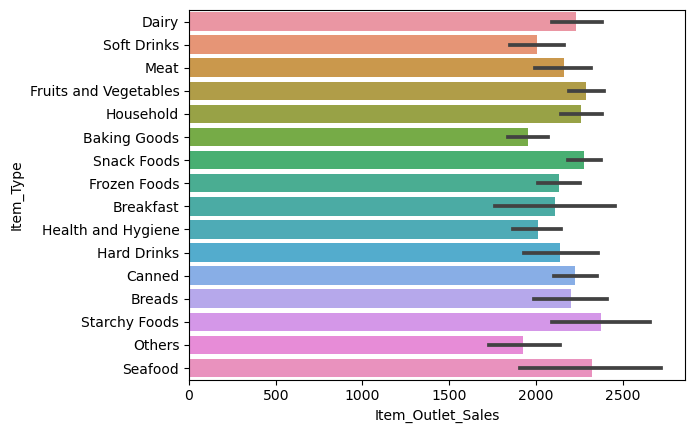

In [27]:
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train)

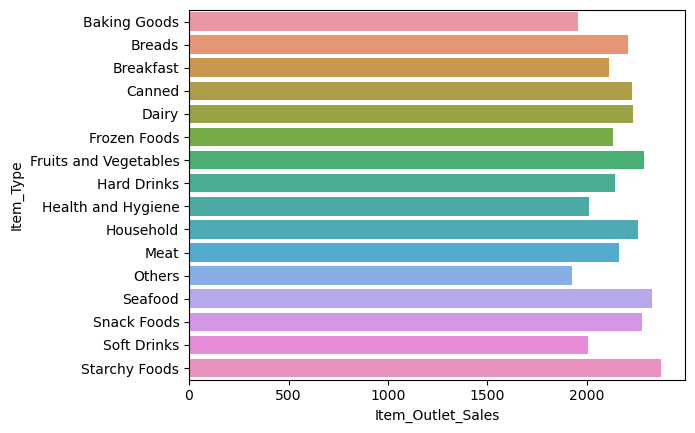

In [28]:
cts = train.groupby('Item_Type')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()
sns.barplot(data=cts1,x='Item_Outlet_Sales',y='Item_Type')
plt.show()

In [30]:
type_ols = ols('Item_Outlet_Sales ~ Outlet_Type',data=train).fit()
table = anova_lm(type_ols,tpy=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Type,3.0,5.945604e+09,1.981868e+09,894.650012,0.0
Residual,8519.0,1.887166e+10,2.215244e+06,NaN,NaN


## Conclusion : outlet type does affect the Item Type

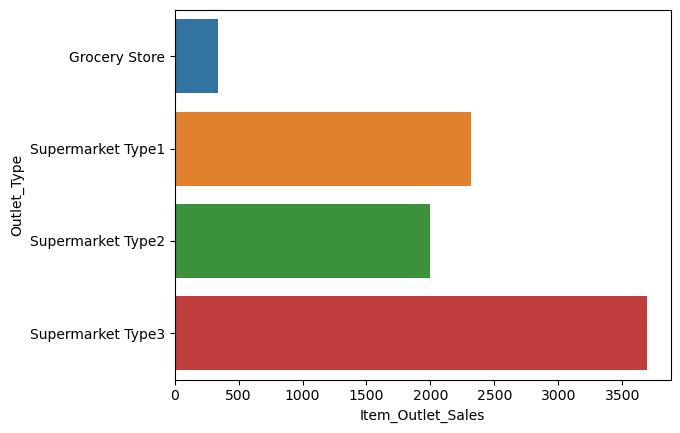

In [35]:
cts2 = train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
cts3 = cts2.reset_index()
sns.barplot(data=cts3,x='Item_Outlet_Sales',y='Outlet_Type')
#plt.xlabel("Mean Item Sales")
#plt.ylable("Outlet Types")
plt.show()

In [36]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
type_ols = ols('Item_Outlet_Sales ~ Item_Fat_Content',data=train).fit()
table = anova_lm(type_ols,tpy=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,4.0,2.009519e+07,5.023797e+06,1.725709,0.141221
Residual,8518.0,2.479717e+10,2.911149e+06,NaN,NaN


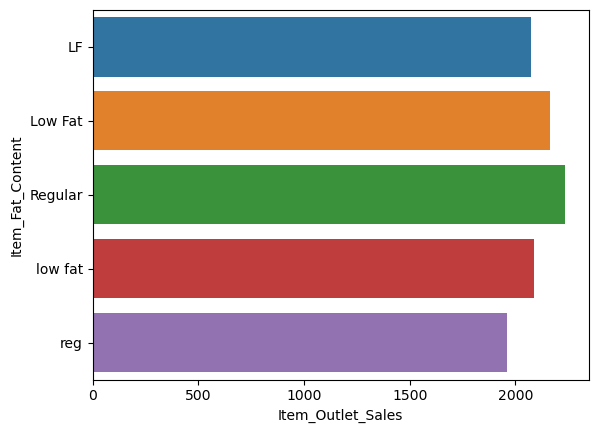

In [42]:
cts4 = train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
cts5 = cts4.reset_index()
sns.barplot(data=cts5,x='Item_Outlet_Sales',y='Item_Fat_Content')
#plt.xlabel("Mean Item Sales")
#plt.ylable("Item_Fat_Content")
plt.show()

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
# train1 = train['Item_Fat_Content'].replace({'low fat': 'LF'})

In [77]:
train1 = train.replace(to_replace=r'LF', value='n_LF', regex=True)

In [78]:
train1 = train.replace(to_replace=r'Low Fat', value='n_LF', regex=True)

In [79]:
train1 = train.replace(to_replace=r'low fat', value='n_LF', regex=True)

In [80]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [91]:
# train1['Item_Fat_Content'].unique()

In [99]:
train['Item_Fat_Content'].unique()

array(['NLF', 'Reg'], dtype=object)

In [93]:
train["Item_Fat_Content"].replace(
{
    'Low Fat':'NLF',
    'low fat':'NLF',
    'LF':'NLF',
    'n_LF':'NLF',
    'Regular':'Reg',
    'reg':'Reg',
},inplace=True)

In [98]:
train1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
n_LF        112
Name: Item_Fat_Content, dtype: int64

In [96]:
type_ols = ols('Item_Outlet_Sales ~ Item_Fat_Content',data=train).fit()
table = anova_lm(type_ols,tpy=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,1.0,8.695560e+06,8.695560e+06,2.986664,0.083989
Residual,8521.0,2.480857e+10,2.911462e+06,NaN,NaN


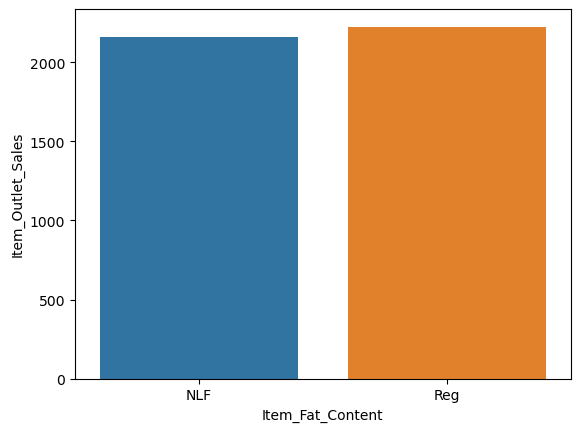

In [101]:
cts4 = train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
cts5 = cts4.reset_index()
sns.barplot(data=cts5,y='Item_Outlet_Sales',x='Item_Fat_Content')
#plt.xlabel("Mean Item Sales")
#plt.ylable("Item_Fat_Content")
plt.show()

## Conclusion:  fat_content will not affect the outlet sales

In [102]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [104]:
type_ols = ols('Item_MRP ~ Item_Type',data=train).fit()
table = anova_lm(type_ols,tpy=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Item_Type,15.0,4.121512e+05,27476.746248,7.161793,6.514365e-16
Residual,8507.0,3.263773e+07,3836.573655,NaN,NaN


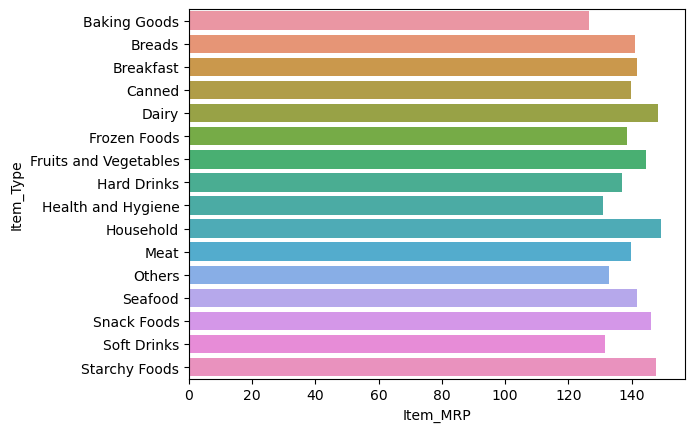

In [109]:
cts6 = train.groupby('Item_Type')['Item_MRP'].mean()
cts7 = cts6.reset_index()
sns.barplot(data=cts7,x='Item_MRP',y='Item_Type')
#plt.xlabel("Mean Item Sales")
#plt.ylable("Item_Fat_Content")
plt.show()

# Chi Square Test

In [110]:
from scipy.stats import chi2_contingency

In [111]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,NLF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,NLF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,NLF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Is Fat Content dependent on Item Type?

In [126]:
ctab = pd.crosstab(train['Item_Fat_Content'],train['Item_Type'])

In [128]:
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)
#print(expected_frequencies)

0.0


#### Conclusion: Fat Ci=ontent and Item Types mat be dependent

### Is Outlet Type dependent on Item Type?

In [124]:
ctab = pd.crosstab(train['Outlet_Type'],train['Item_Type'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.9989342767300661


#### Conclusion: Outlet Type and Item Types mat be independent

### Is Outlet Location Type dependent on Item Type?

In [125]:
ctab = pd.crosstab(train['Outlet_Location_Type'],train['Item_Type'])
test_statistic, p_value, df, expected_frequencies = chi2_contingency(ctab)
print(p_value)

0.9963035075844918


#### Conclusion: Outlet Type and Item Types mat be independent